In [1]:
import numpy as np
import os
import stompy.model.delft.dflow_model as dfm
from stompy import utils
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import six
six.moves.reload_module(dfm)

<module 'stompy.model.delft.dflow_model' from '/home/rustyh/src/stompy/stompy/model/delft/dflow_model.py'>

In [3]:
# 2016 runs
run_dirs=[#'data_2016long_3d_asbuilt_impaired', # 50 layers, evap
          #'data_2013_3d_asbuilt_impaired-v002'
    
          #'data_salt_filling-v05_existing_impaired',
          #'data_salt_filling-v04_asbuilt_impaired',
          
    #'data_2016long_3d_asbuilt_impaired-v001', # 50 layers no evap
          #'data_2016long_3d_asbuilt_impaired-v011', # 60 layers, w/ChangeVelocityAtStructures
          #'data_2016long_3d_asbuilt_impaired-v013', # 60 layers, omits ChangeVelocityAtStructures
    
          #'data_2016long_3d_asbuilt_impaired-v002', # 100 layers
          #'data_2016long_3d_asbuilt_impaired_scen1-v001', # 100 layers
          #'data_2016long_3d_asbuilt_impaired-v003', # default epshu, 50 layers
          #'data_2016long_3d_asbuilt_impaired-v004',# default epshu and 100 layers
          #'data_2016long_3d_asbuilt_impaired-v005',# copy of v001 with new DFM compile
          #'data_short_v000', # should match v001?
          #'data_short_v001', # identical to 0
          #'data_short_v002', 
          #'data_short_v003', 
          #'data_short_v004', # changed bedlevtype, went nan         
          #'data_short_v005', 
          #'data_short_v006',
          #'data_short_v007', # identical to 8
          #'data_short_v008', # very mixed
          #'data_short_v009', # no improvement 
          #'data_short_v011', # no improvement
          #'data_short_v012', 
          #'data_short_v013', 
          #'data_short_v015', # candidate
          #'data_short_v016', # crap
          #'data_short_v017', # crap
          #'data_short_v018', # crap
          #'data_salt_filling-v05_existing_impaired-copy2', # duplicate, should be the same as above
          
          #'data_2016long_3d_existing_impaired',
          #'data_2016long_3d_existing_impaired-v001',
    
         #'data_3d_asbuilt_impaired',
         #'data_3d_existing_impaired',
         #'data_3d_asbuilt_impaired-v001',
         #'data_3d_existing_impaired-v001',
         #'data_3d_asbuilt_impaired-v002', # debug salt?
         #'data_3d_existing_impaired-v002',
         #'data_3d_asbuilt_impaired-v003', # CFLmax=0.35
         #'data_3d_asbuilt_impaired-v004', # dicoww=1e-7
    
         #'data_3d_existing_impaired-v003', # 
         #'data_3d_existing_impaired-v004', # AutoTimestep=5, global time stepping
         #'data_3d_existing_impaired-v005', # CFLmax=0.45 
         #'data_3d_existing_impaired-v006', # limtyp=0 - mixed
         #'data_3d_existing_impaired-v007', # limtyp=9 - bad 
         #'data_3d_existing_impaired-v008', # should be same original 
         #'data_3d_existing_impaired-v009', # should be same original     
         #'data_3d_existing_impaired-v012', # solid run with CFLmax=0.4     
         #'data_3d_asbuilt_impaired-v005', # stalled run with CFLmax=0.4
    
         #'data_2016long_3d_asbuilt_impaired-v015',
         #'data_2016long_3d_asbuilt_impaired_scen3-v003',
         #'data_2016long_3d_asbuilt_impaired-v020',
         #'data_2016long_3d_asbuilt_impaired-v020_r01',
         #'data_2016long_3d_asbuilt_impaired_scen0_l100-v025',
         #'data_2016long_3d_asbuilt_impaired_scen0_l100-v026',
         'data_2016long_3d_asbuilt_impaired_scen1_slr0.61m_l100-v003',
         'data_2016long_3d_asbuilt_impaired_scen0_slr0.61m_l100-v005',
]

In [4]:

if 0:
    # 2013 runs
    run_dirs=[
        # 'data_2013_3d_asbuilt_impaired-v002', # complete 2013 run. 50 layers. Looks okay.
        #'data_2013_3d_asbuilt_impaired_slr0.61m',  # epshu=0.005. Looks like salt problems
        #'data_2013_3d_asbuilt_impaired_slr0.61m-v001', # default epshu. Looks like salt problems.
    ]

In [5]:
models=[ dfm.DFlowModel.load(run_dir) for run_dir in run_dirs]

<IPython.core.display.Javascript object>


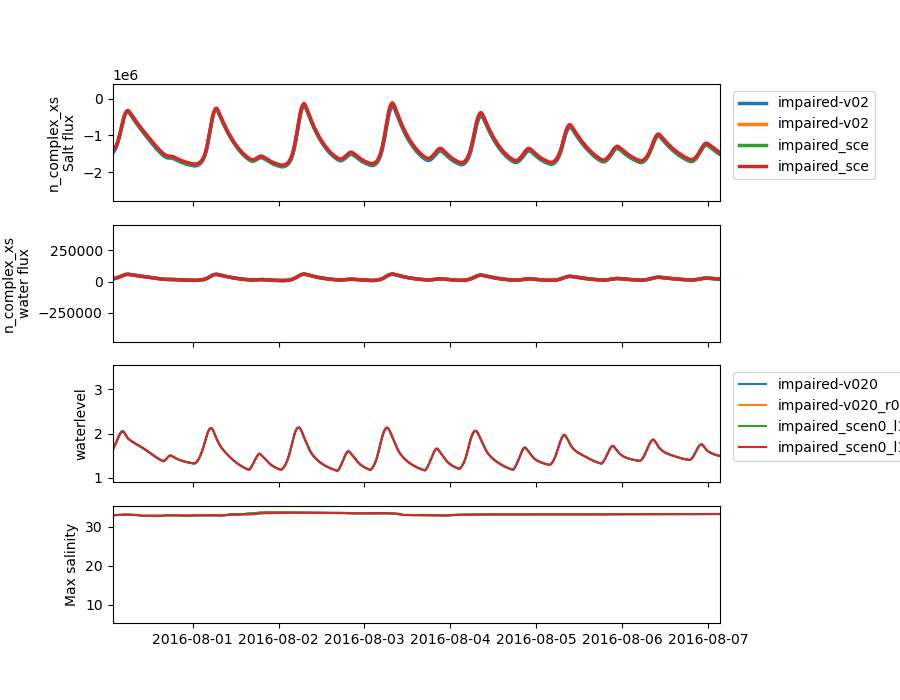

/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [6]:
fig,axs=plt.subplots(4,1,sharex=True,figsize=[9,7])

labels=[mod.run_dir for mod in models]
labels=utils.distinct_substrings(labels)

t_ref=np.datetime64("2016-08-20 00:00")

xs='n_complex_xs'
# xs='pesca_mid_xs'

for mod,label in zip(models,labels):
    his_ds=mod.his_dataset(refresh=True)
    
    Qsalt=his_ds['cross_section_cumulative_salt'].sel(cross_section=xs)
    flux_ini=Qsalt.sel(time=t_ref,method='nearest').values
    salt_flux=Qsalt.values - flux_ini
    flux=his_ds['cross_section_cumulative_discharge'].sel(cross_section=xs)
    
    if np.isnan(salt_flux[-1]):
        label="NAN"+label
    axs[0].plot(Qsalt.time, salt_flux,
                label=label[:12],lw=2.5)
    axs[1].plot(flux.time, flux,label=label[:12],lw=2.5)
    
    axs[2].plot(his_ds.time, his_ds['waterlevel'].sel(stations='pc3'),label=label)
    axs[0].text(Qsalt.time.values[-1],
                np.random.random() + salt_flux[-1],label) # hard to see overlapping lines
    
    salt_max=his_ds.salinity.max(dim='stations').max(dim='laydim')
    axs[3].plot(his_ds.time,
                salt_max,
                label=label[:12])
    axs[3].text(his_ds.time.values[-1],
                0.1*np.random.random() + salt_max[-1],label) # hard to see overlapping lines
    
axs[0].set_ylabel(f'{xs}\nSalt flux')
axs[1].set_ylabel(f'{xs}\nwater flux')
axs[2].set_ylabel('waterlevel')
axs[3].set_ylabel('Max salinity')
    
axs[0].legend(loc='upper left',bbox_to_anchor=[1.01,1])
axs[2].legend(loc='upper left',bbox_to_anchor=[1.01,1])
fig.subplots_adjust(right=0.8)
# When the tide is rising, salt flux is going down.
# That means positive flux is downstream.

<IPython.core.display.Javascript object>


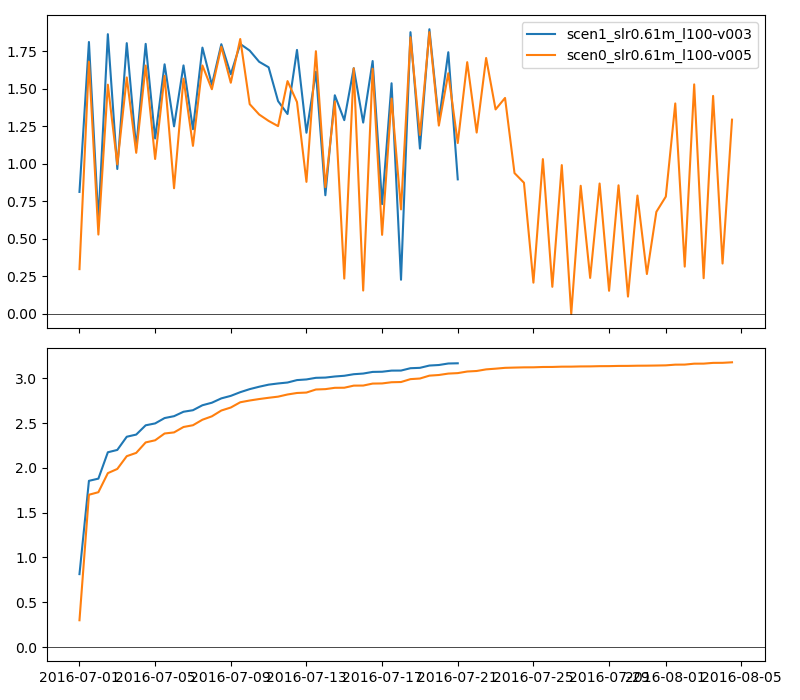

data_2016long_3d_asbuilt_impaired_scen1_slr0.61m_l100-v003
data_2016long_3d_asbuilt_impaired_scen0_slr0.61m_l100-v005


In [6]:
# Check mass balance output:
import pandas as pd

labels=[mod.run_dir for mod in models]
labels=utils.distinct_substrings(labels)

fig,axs=plt.subplots(2,1,sharex=True,figsize=(8,7))

def bilog(x,xmin=1.0):
    return np.sign(x)*np.log10(np.abs(x).clip(xmin))

for model,label in zip(models,labels):
    print(model.run_dir)
    balance_csv=os.path.join(model.run_dir,"DFM_OUTPUT_flowfm/flowfm_0000_mass_balances.csv")
    df=pd.read_csv(balance_csv,parse_dates=['datetimestart'])
    df1=df[ (df.Constituent=='salt') & (df['Mass Balance Area']=='Whole model')]
    grp=df1.groupby('datetimestart')
    # Not sure that I have a good way of getting the actual total salt
    # just have fluxes here.
    net=grp['Nett'].sum()

    axs[0].plot(net.index.values,bilog(net.values),label=label)
    axs[1].plot(net.index.values,bilog(np.cumsum(net.values)),label=label)

axs[0].axhline(0,color='k',lw=0.5)
axs[1].axhline(0,color='k',lw=0.5)

axs[0].legend()
fig.tight_layout()

<IPython.core.display.Javascript object>


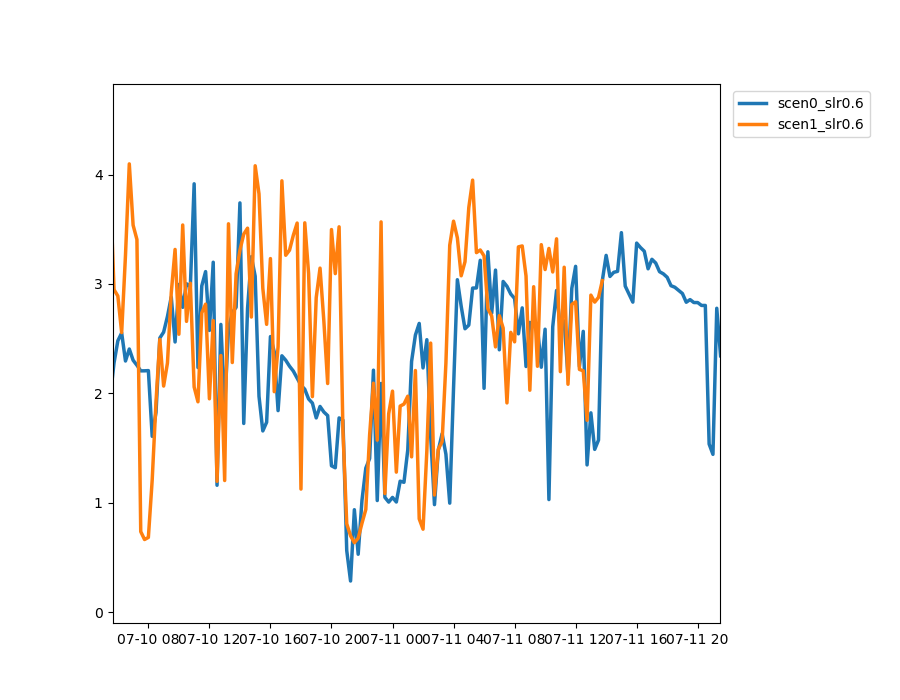

In [9]:
# compare timesteps
fig,ax=plt.subplots(1,1,sharex=True,figsize=[9,7])

labels=[mod.run_dir for mod in models]
labels=utils.distinct_substrings(labels)

t_ref=np.datetime64("2016-08-20 00:00")

for mod,label in zip(models,labels):
    his_ds=mod.his_dataset(refresh=True)
    
    ax.plot(his_ds.time, his_ds.timestep,
            label=label[:12],lw=2.5)
    
ax.legend(loc='upper left',bbox_to_anchor=[1.01,1])
fig.subplots_adjust(right=0.8)


In [7]:
ds=models[0].his_dataset()

In [11]:
# how do the
ds

<xarray.Dataset>
Dimensions:                                       (cross_section: 16, cross_section_geom_nNodes: 191, gategen_geom_nNodes: 5, gategens: 2, general_structure_geom_nNodes: 33, general_structures: 4, laydim: 100, laydimw: 101, nFlowElemContourPts: 4, nFlowElemWithBnd: 5657, nFlowLink: 9082, nFlowLinkPts: 2, nNetLink: 9454, nNetLinkPts: 2, source_sink: 2, source_sink_geom_nNodes: 4, source_sink_pts: 3, station_geom_nNodes: 145, stations: 145, time: 1446)
Coordinates:
    station_x_coordinate                          (stations) float64 ...
    station_y_coordinate                          (stations) float64 ...
    station_name                                  (stations) |S256 b'pch_up                                                                                                                                                                                                                                                          ' ... b'seepageB                            

In [8]:
model=models[0]
mapds=model.map_dataset(xr_kwargs=dict(decode_times=False))

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


<IPython.core.display.Javascript object>


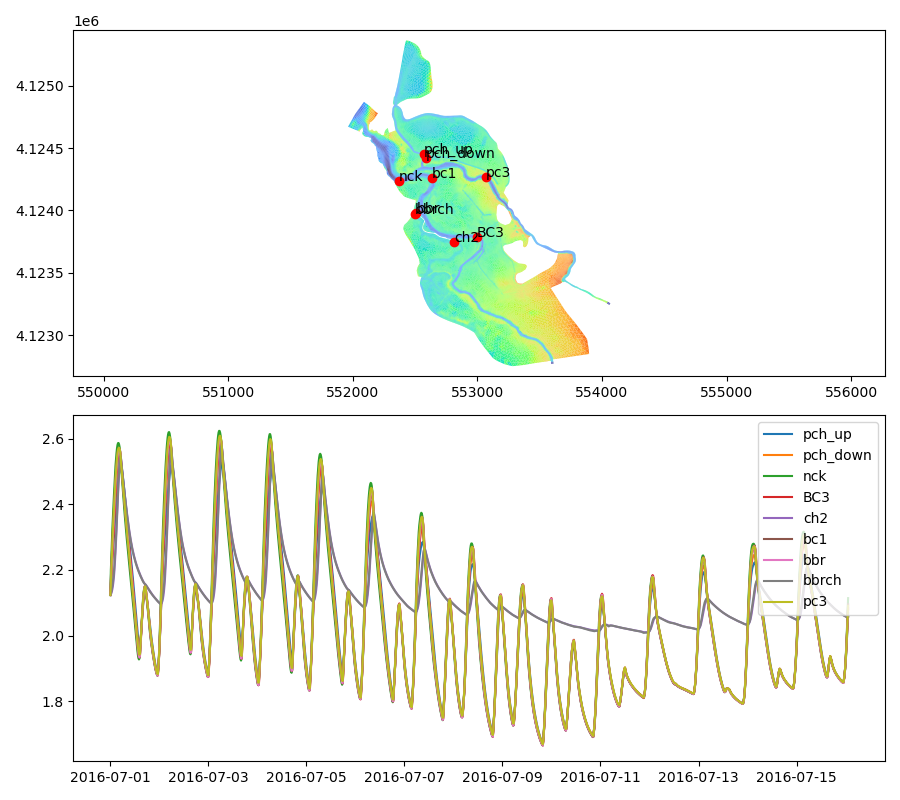

In [14]:
# Check on water level time series in SLR case

fig,axs=plt.subplots(2,1,figsize=[9,8])

plt.setp(axs,adjustable='datalim')

mapds.grid.plot_cells(values=mapds['mesh2d_flowelem_bl'].values,cmap='turbo',
                      ax=axs[0])
stns=['pch_up','pch_down','nck','BC3','ch2','bc1',
           'bbr','bbrch','pc3']
for stn in stns:
    axs[1].plot(ds.time.values,
                ds.waterlevel.sel(stations=stn),label=stn)
    x=ds.station_x_coordinate.sel(stations=stn)
    y=ds.station_y_coordinate.sel(stations=stn)
    axs[0].text(x,y,stn)
        
axs[0].plot(ds.station_x_coordinate.sel(stations=stns),
            ds.station_y_coordinate.sel(stations=stns),
           'ro')    
axs[1].legend()
fig.tight_layout()

<IPython.core.display.Javascript object>


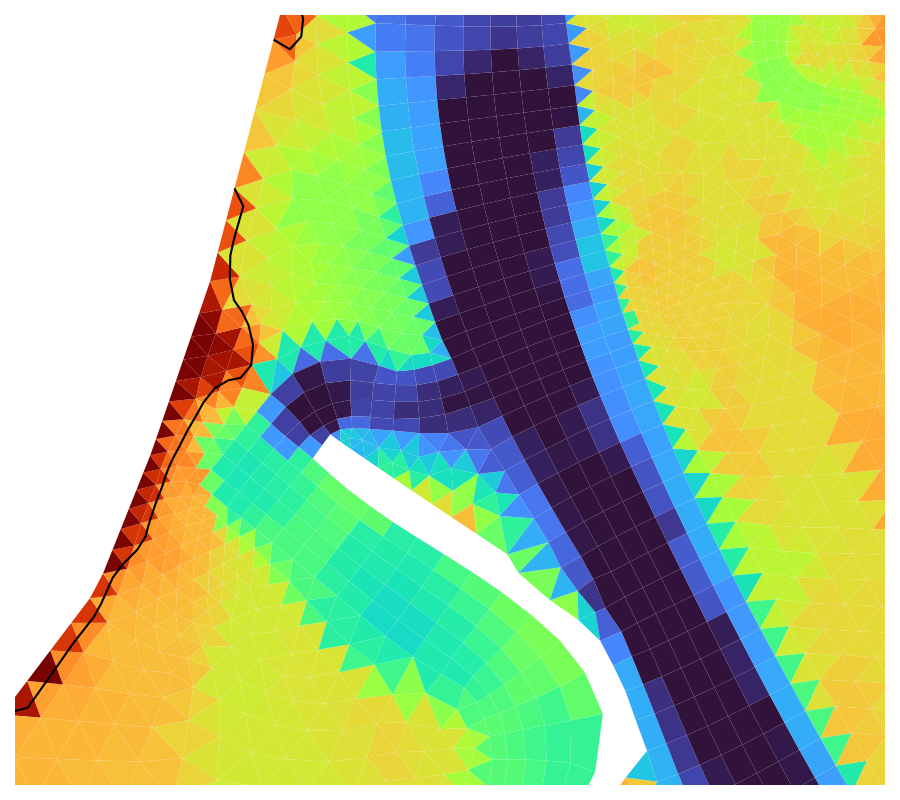

In [27]:
# Compare levee and grid terrain
fig,ax=plt.subplots(figsize=(9,8))
ax.set_adjustable('datalim')

z=np.r_[2.4]

ccoll=mapds.grid.plot_cells(values=mapds['mesh2d_flowelem_bl'].values,
                            cmap='turbo')
lcoll=mapds.grid.scalar_contour(mapds['mesh2d_flowelem_bl'].values,z)
ax.add_collection(lcoll)

if model.fixed_weirs is None:
    model.load_fixed_weirs_from_run()
    
for fw in model.fixed_weirs:
    _name,pnts,_=fw
    scat=ax.scatter(pnts[:,0],pnts[:,1],25,pnts[:,2],cmap='turbo')

clim=[0.5,3.0]
scat.set_clim(clim)
ccoll.set_clim(clim)

ax.axis('off')
fig.tight_layout()
ax.axis( (552418., 553093., 4123453., 4124051.) )

In [28]:
ax.axis()

(552418.5433445929, 553093.9281771097, 4123453.365066545, 4124051.1194585427)

In [6]:
labels=[mod.run_dir for mod in models]
labels=utils.distinct_substrings(labels)

plt.figure()

for mod,label in zip(models,labels):
    ds=mod.his_dataset()
    l=plt.plot(ds.time,ds.timestep,label=label)
    # And running average:
    plt.plot(ds.time,np.cumsum(ds.timestep)/(1+np.arange(len(ds.time))),
             label='__nolabel__',color=l[0].get_color(),lw=3,alpha=0.6)
                                             
plt.legend()

<IPython.core.display.Javascript object>

NameError: name 'his_dss' is not defined

In [21]:
mapds.dss[0]

<xarray.Dataset>
Dimensions:                      (Two: 2, mesh2d_nEdges: 9454, mesh2d_nFaces: 5629, mesh2d_nInterfaces: 101, mesh2d_nLayers: 100, mesh2d_nMax_face_nodes: 4, mesh2d_nNodes: 3826, time: 4)
Coordinates:
    mesh2d_node_x                (mesh2d_nNodes) float64 5.52e+05 ... 5.528e+05
    mesh2d_node_y                (mesh2d_nNodes) float64 4.125e+06 ... 4.124e+06
    mesh2d_edge_x                (mesh2d_nEdges) float64 ...
    mesh2d_edge_y                (mesh2d_nEdges) float64 ...
    mesh2d_face_x                (mesh2d_nFaces) float64 5.52e+05 ... 5.528e+05
    mesh2d_face_y                (mesh2d_nFaces) float64 4.125e+06 ... 4.124e+06
    mesh2d_layer_z               (mesh2d_nLayers) float64 ...
  * time                         (time) float64 0.0 1.728e+05 ... 5.184e+05
Dimensions without coordinates: Two, mesh2d_nEdges, mesh2d_nFaces, mesh2d_nInterfaces, mesh2d_nLayers, mesh2d_nMax_face_nodes, mesh2d_nNodes
Data variables:
    projected_coordinate_system  int32 ...
 

In [7]:
model=models[0]
mapds=model.map_dataset(xr_kwargs=dict(decode_times=False))

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


<IPython.core.display.Javascript object>


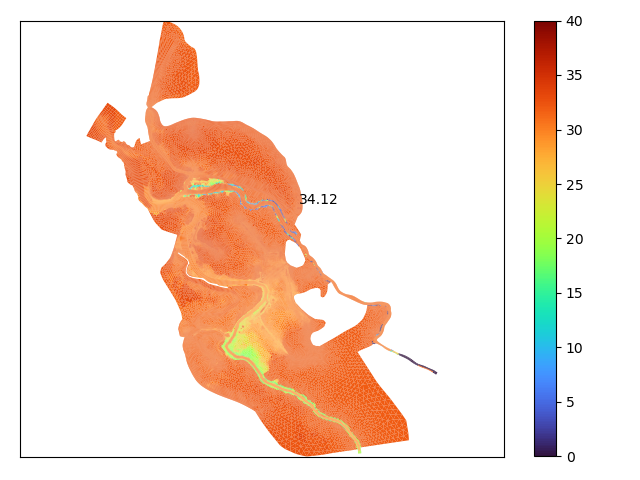

In [7]:
fig,ax=plt.subplots()
ax.set_adjustable('datalim')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)

salt=mapds['mesh2d_sa1'].isel(time=-1).values
salt=np.nanmax(salt,axis=1)
#salt=np.nanmean(salt,axis=1)
ccoll=mapds.grid.plot_cells(values=salt, mask=np.isfinite(salt),cmap='turbo')
#ax.plot(seep_geom[0][1][:,0],seep_geom[0][1][:,1],'r-o')
plt.colorbar(ccoll)
the_spot=mapds.grid.cells_center()[np.argmax(salt)]
plt.text(the_spot[0],the_spot[1],f"{salt.max():.2f}")
ccoll.set_clim([0,40])
fig.tight_layout()

In [8]:
mapds.dss[0]

<xarray.Dataset>
Dimensions:                      (Two: 2, mesh2d_nEdges: 9454, mesh2d_nFaces: 5629, mesh2d_nInterfaces: 101, mesh2d_nLayers: 100, mesh2d_nMax_face_nodes: 4, mesh2d_nNodes: 3826, time: 4)
Coordinates:
    mesh2d_node_x                (mesh2d_nNodes) float64 5.52e+05 ... 5.528e+05
    mesh2d_node_y                (mesh2d_nNodes) float64 4.125e+06 ... 4.124e+06
    mesh2d_edge_x                (mesh2d_nEdges) float64 ...
    mesh2d_edge_y                (mesh2d_nEdges) float64 ...
    mesh2d_face_x                (mesh2d_nFaces) float64 5.52e+05 ... 5.528e+05
    mesh2d_face_y                (mesh2d_nFaces) float64 4.125e+06 ... 4.124e+06
    mesh2d_layer_z               (mesh2d_nLayers) float64 ...
  * time                         (time) float64 0.0 1.728e+05 ... 5.184e+05
Dimensions without coordinates: Two, mesh2d_nEdges, mesh2d_nFaces, mesh2d_nInterfaces, mesh2d_nLayers, mesh2d_nMax_face_nodes, mesh2d_nNodes
Data variables:
    projected_coordinate_system  int32 ...
 

<IPython.core.display.Javascript object>


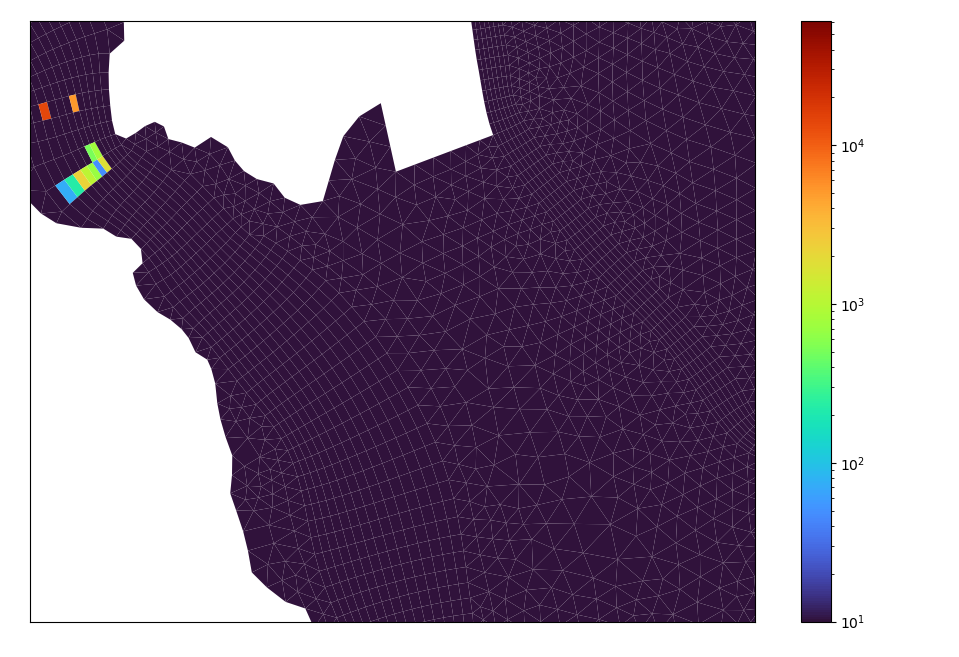

In [8]:
from matplotlib import colors
fig,ax=plt.subplots()
ax.set_adjustable('datalim')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)


numlim=(mapds['mesh2d_Numlimdt'].isel(time=-1).values
        -
        mapds['mesh2d_Numlimdt'].isel(time=-2).values).clip(10)
coll=mapds.grid.plot_cells(values=numlim, cmap='turbo',norm=colors.LogNorm())
c=np.argmax(numlim)
cxy=mapds.grid.cells_center()[c]
ax.plot([cxy[0]],[cxy[1]],'ro')
plt.colorbar(coll)
fig.tight_layout()

<IPython.core.display.Javascript object>


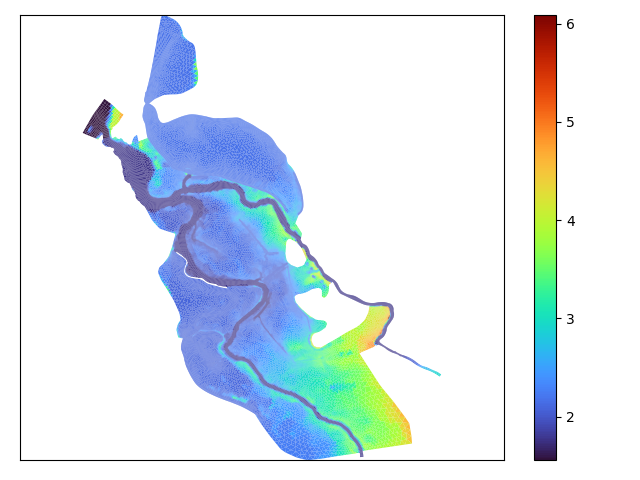

In [9]:
fig,ax=plt.subplots()
ax.set_adjustable('datalim')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)

umag=mapds['mesh2d_s1'].isel(time=-1).values
ccoll=mapds.grid.plot_cells(values=umag, cmap='turbo')
plt.colorbar(ccoll)
fig.tight_layout()

<IPython.core.display.Javascript object>


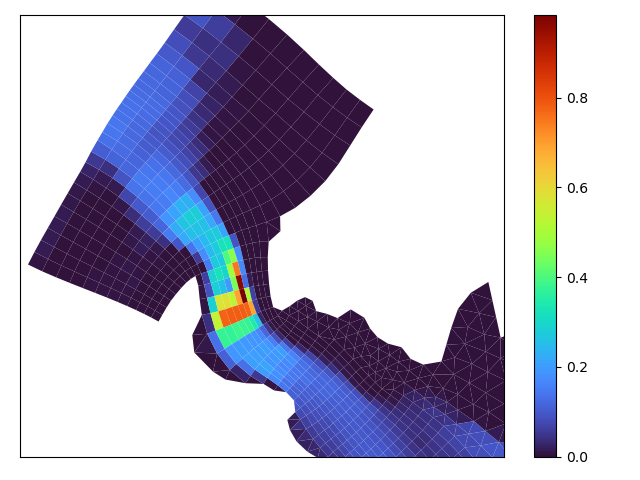

In [26]:
ucmag=mapds['mesh2d_ucmag'].isel(time=-1).values
ucmag.shape
ucmax=np.nanmax(ucmag,axis=1)

fig,ax=plt.subplots()
ax.set_adjustable('datalim')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)

ccoll=mapds.grid.plot_cells(values=ucmax, cmap='turbo')
plt.colorbar(ccoll)
fig.tight_layout()

In [11]:
his=models[0].his_dataset()

<IPython.core.display.Javascript object>


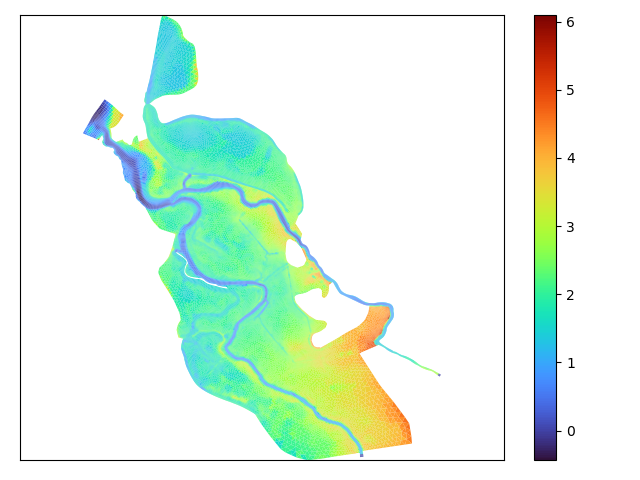

In [11]:
z_bed=mapds['mesh2d_flowelem_bl'].values # .isel(time=-1).values

fig,ax=plt.subplots()
ax.set_adjustable('datalim')
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)

ccoll=mapds.grid.plot_cells(values=z_bed, cmap='turbo')
plt.colorbar(ccoll)
fig.tight_layout()

Dev for dredging around Butano Weir
--

Need to better understand what's going on at Butano Weir.



<IPython.core.display.Javascript object>


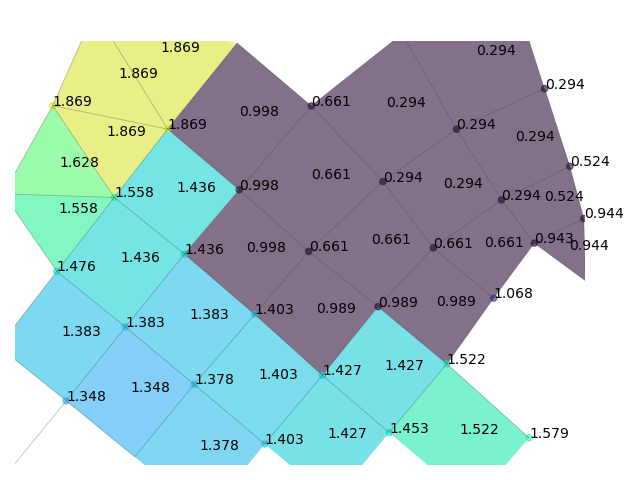

(552492.0, 552516.0, 4123966.0, 4123983.0)

In [11]:
# load the input grid
g=model.grid
# zoom=(552459., 552533., 4123940., 4123995.)
zoom=(552492., 552516., 4123966., 4123983.)

fig,ax=plt.subplots()
ax.set_adjustable('datalim')

g.plot_edges(lw=0.5,color='k',clip=zoom,alpha=0.3)
bl=mapds['mesh2d_flowelem_bl'].values
coll=mapds.grid.plot_cells(values=bl,cmap='turbo',clip=zoom,alpha=0.6,
                           labeler=lambda i,r: f"{bl[i]:.3f}")

scat=g.plot_nodes(values=g.nodes['depth'],cmap='turbo',clip=zoom,alpha=0.6,
                  labeler=lambda i,r: f"{g.nodes['depth'][i]:.3f}")
clim=[1,2.5]
scat.set_clim(clim)
coll.set_clim(clim)

ax.axis('off')
fig.tight_layout()
ax.axis(zoom)


In [12]:
# which partition is this in? proc 3
x=[552501,4123974]
cglobal=mapds.grid.select_cells_nearest(x,inside=True)
proc,clocal=mapds.cell_g2l[cglobal]
print(proc)

3


In [13]:
from stompy.grid import unstructured_grid
gloc=unstructured_grid.UnstructuredGrid.read_ugrid(mapds.dss[proc])

rstloc=xr.load_dataset(os.path.join(model.mdu.output_dir(),
                                    f'flowfm_{proc:04d}_20160711_000000_rst.nc'))

In [14]:
six.moves.reload_module(dfm)
Medge,Mcell = dfm.rst_mappers(rstloc,gloc)

INFO:UnstructuredGrid:Recalculating edge to cells


In [17]:
rstloc.dims['wdim']

101

<IPython.core.display.Javascript object>


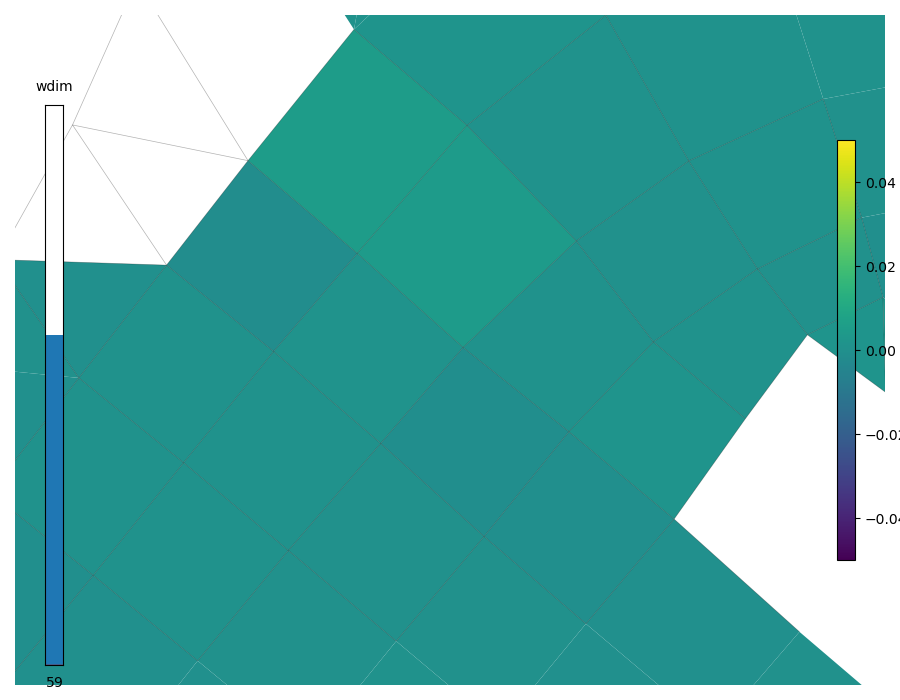

/home/rustyh/miniconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(552492.0, 552516.0, 4123966.0, 4123983.0)

In [29]:
# cell center velocities at various layers 
import matplotlib.widgets as mw

k=54

fig,ax=plt.subplots(figsize=(9,7))
ax_ctrl=fig.add_axes([0.05,0.05,0.02,0.8])
cax=fig.add_axes([0.93,0.2,0.02,0.6])


if 0:
    dim='laydim'
    clim=[0,0.75]
    def scal(k):
        ucx=rstloc.ucx.isel(time=0,laydim=k).values
        ucy=rstloc.ucy.isel(time=0,laydim=k).values
        ucx=np.where(ucx<-900,np.nan,ucx)
        ucy=np.where(ucy<-900,np.nan,ucy)
        umag=np.sqrt( ucx**2 + ucy**2 )
        return umag
if 1:
    dim='wdim'
    clim=[-0.05,0.05]
    def scal(k):
        w=rstloc['ww1'].isel(time=0,wdim=k)
        w=np.where(w<-900,np.nan,w)
        return w

k_slider=mw.Slider(ax_ctrl,dim,0,rstloc.dims[dim]-1,valinit=0,valstep=1,
                  orientation='vertical')

ax.set_adjustable('datalim')
ax.axis('off')

gloc.plot_edges(lw=0.5,color='k',clip=zoom,alpha=0.3,ax=ax)

ccoll=None

def update_k(k):
    global ccoll
    if ccoll in ax.collections:
        ax.collections.remove(ccoll)
    values=scal(k)
    ccoll=gloc.plot_cells(values=values,ax=ax)
    ccoll.set_clim(clim)
    cax.cla()
    plt.colorbar(ccoll,cax=cax)
    
k_slider.on_changed(update_k)
k_slider.set_val(71)

fig.tight_layout()
ax.axis(zoom)

<IPython.core.display.Javascript object>


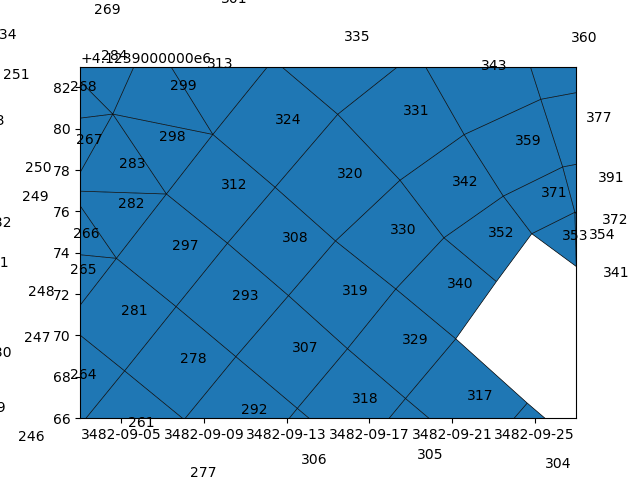

(552492.0, 552516.0, 4123966.0, 4123983.0)

In [41]:
plt.figure()
gloc.plot_edges(color='k',lw=0.5)
gloc.plot_cells(labeler='id')
plt.axis(zoom)

In [33]:
rstloc

<xarray.Dataset>
Dimensions:           (laydim: 100, nFlowElem: 4984, nFlowLink: 7784, nFlowLinkPts: 2, nNetElem: 4984, nNetElemMaxNode: 4, nNetLink: 7990, nNetLinkPts: 2, time: 1, wdim: 101)
Coordinates:
  * time              (time) datetime64[ns] 2016-07-11
    FlowLink_xu       (nFlowLink) float64 5.525e+05 5.525e+05 ... 5.528e+05
    FlowLink_yu       (nFlowLink) float64 4.124e+06 4.124e+06 ... 4.124e+06
Dimensions without coordinates: laydim, nFlowElem, nFlowLink, nFlowLinkPts, nNetElem, nNetElemMaxNode, nNetLink, nNetLinkPts, wdim
Data variables:
    timestep          (time) timedelta64[ns] 00:00:01.047955
    s1                (time, nFlowElem) float64 2.847 2.212 ... 2.158 2.158
    s0                (time, nFlowElem) float64 2.847 2.212 ... 2.158 2.158
    taus              (time, nFlowElem) float64 0.0 0.0 0.0 ... 0.005878 0.0 0.0
    czs               (time, nFlowElem) float64 9.969e+36 ... 9.969e+36
    FlowElem_bl       (time, nFlowElem) float64 2.847 2.207 ... 2.153 2.153

In [12]:
# Is this reset from a time when the weir was limiting?
# potential problem cell is 308.
# rst is from 10 days in
# so steps file should have 14400
steps_fn=os.path.join(model.run_dir,'flowfm_0003.steps')

df_steps=pd.read_csv(steps_fn,sep=r'\s+',skiprows=1,
                     names=['t_mins','dts', 'dtsc', 'kkcflmx', 
                            'k_from_bed', 'vol1_kcflmx', 
                            'squ2D_kcflmx', 'squ_kcflmx', 'sqi_kcflmx'])

In [14]:
# This gives 313(-1) as the most limiting cell. 
# That's consistent. 312(0) is the upstream cell on the N
# side of the weir. 324 is the downstream cell. So 
# at least from .steps info, the problems are in that U/S
# cell. 332 is closer to the middle of the channel, one 
# more row downstream.
df_steps.groupby('kkcflmx').size().sort_values()

kkcflmx
955          1
3178         1
2801         1
896          1
895          1
338          1
3110         2
3027         2
2567         2
3616         2
4245         2
2293         3
300          3
3107         4
225          5
3037         7
298          8
3180         8
589          9
3330        10
3038        10
3181        10
2951        10
283         19
2957        20
3179        28
590         34
3112        37
3032        58
3104        77
2294        81
244         84
2726        97
355        108
279        120
3026       171
468        189
354        473
373        688
309        858
327      19107
325      60913
332     107633
294     140129
0       383146
313     547852
dtype: int64

In [15]:
# average time step when 313 is limiting is still 1.68s for scen0, 1.60 for scen1
# so I think it's more about the substepping.
df_steps[ df_steps.kkcflmx==313 ].dtsc.mean()

1.6078105418981774

In [16]:
df_313=df_steps[ df_steps.kkcflmx==313 ]
df_313.groupby('k_from_bed').size()
# 18th cell from the bed is the most limiting.
# That sounds like a surface or near surface cell.

k_from_bed
17.0      5412
18.0    444143
19.0     68039
20.0     22343
21.0      4434
22.0      1986
23.0       848
24.0       421
25.0       161
26.0        65
dtype: int64

In [17]:
df_313.vol1_kcflmx.mean() # always 0.4885.
# not a surface cell.

0.4884999999999992

In [18]:
his_slr=models[0].his_dataset()

In [19]:
#model_base=dfm.DFlowModel.load('data_2016long_3d_asbuilt_impaired_scen0_l100-v026')
model_base=dfm.DFlowModel.load('data_2016long_3d_asbuilt_impaired_scen1_l100-v003')
his_base=model_base.his_dataset()

<IPython.core.display.Javascript object>


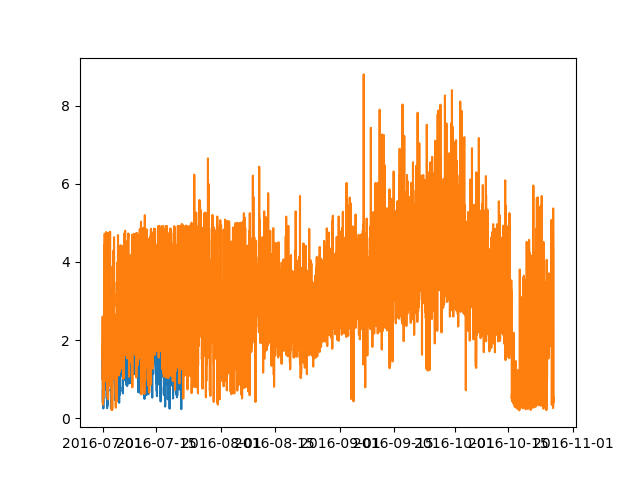

In [21]:
plt.figure()
plt.plot(his_slr.time, his_slr.timestep,label='slr')
plt.plot(his_base.time, his_base.timestep,label='base')


In [22]:
t_end=his_slr.time.values[-1]

t_slr=his_slr.time.values
dt_slr=his_slr.timestep.values
t_base=his_base.time.values
dt_base=his_base.timestep.values

In [28]:
print("Mean steps/time base")
steps_per_time_base=(1./dt_base[ t_base<=t_end]).mean()
print( steps_per_time_base )
print("Mean steps/time slr")
steps_per_time_slr=(1./dt_slr).mean()
print( steps_per_time_slr)
print("Ratio: ",steps_per_time_slr/steps_per_time_base)
# unexplained remaining:
# scen0: 2.81/1.70 = 1.65
# scen1: 1.86 from timesteps, 2.25x remaining

Mean steps/time base
0.3972088447825674
Mean steps/time slr
0.7377934614819431
Ratio:  1.8574446948325438


In [25]:
# For scen0:
# SLR run is 25d 21:20 in, which took 2d 16:03
# the base run 22:48.
# so I'm looking for an overall slowdown of
# 64/22.75 = 2.8x

# For scen1,
# SLR run is at 20d 17:05:00 which took 3d 14.5h
# base got to that by ...20h40
# (3*24+14.5)/(20.67) = 4.185

4.184808901790033

In [29]:
# How much of this is because there are more wet cells?
map_slr=models[0].map_dataset()

In [30]:
map_base=model_base.map_dataset()

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


In [31]:
epshu=0.005
recs=[]

Ac_slr=map_slr.grid.cells_area()
Ac_base=map_base.grid.cells_area()

for t_idx,t in enumerate(map_slr.time.values):
    n_wet_slr=(map_slr['mesh2d_waterdepth'].isel(time=t_idx).values>epshu).sum()
    n_wet_base=(map_base['mesh2d_waterdepth'].isel(time=t_idx).values>epshu).sum()
  
    dz_slr=map_slr['mesh2d_vol1'].isel(time=t_idx).values / Ac_slr[:,None]
    dz_base=map_base['mesh2d_vol1'].isel(time=t_idx).values / Ac_base[:,None]
    
    recs.append( dict(n_wet_slr=n_wet_slr,n_wet_base=n_wet_base,
                      n_vols_slr=(dz_slr>epshu).sum(),
                      n_vols_base=(dz_base>epshu).sum()))
               

In [32]:
df_n_wet=pd.DataFrame(recs)
print("Ratio of wet 2D cells")
print( df_n_wet['n_wet_slr'].mean() / df_n_wet['n_wet_base'].mean() )

print("Ratio of wet 3D volumes")
print( df_n_wet['n_vols_slr'].mean() / df_n_wet['n_vols_base'].mean() )

Ratio of wet 2D cells
1.6202898442208984
Ratio of wet 3D volumes
2.1286159725219505


In [33]:
# of the 2.8x slowdown in the scen0 SLR run, 1.7x slowdown is
# related to further timestep limitation.
# of the remaining 1.65x, 1.5x could be explained by more 2D cells
# that are wet, and 1.98x could be explained by more 3D volumes
# that are wet.

# of the 4.2x slowdown in the scen1 case, 1.9 from shorter timestep,
# and 1.6 to 2.1x from wet cells/volumes. The 3D count and timesteps
# roughly explain all of the slowdown.


1.0526315789473686